In [1]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [3]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
steps = [
    ( 'scaler', StandardScaler() ),
    ( 'pca', PCA(n_components=5) ),
    ( 'model', KNeighborsRegressor() )
]

In [5]:
pipeline = Pipeline(steps)

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', KNeighborsRegressor())])

In [7]:
pipeline.score(X_test, y_test)

0.6914371549564045

In [8]:
pca = pipeline['pca']

In [9]:
pca


PCA(n_components=5)

In [10]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([6.18388603, 1.49189694, 1.24082374, 0.88552079, 0.79063516]),
 array([0.47442844, 0.1144585 , 0.09519614, 0.06793726, 0.06065762]))

In [11]:
sum(pca.explained_variance_ratio_)

0.8126779551770075

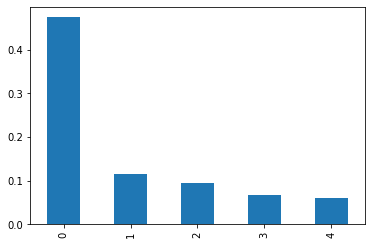

In [13]:
variances = pd.Series(pca.explained_variance_ratio_)
variances.plot.bar()

In [14]:
pca.components_

array([[ 0.24892983, -0.25894886,  0.34531989,  0.01081736,  0.34420929,
        -0.18225918,  0.31695398, -0.32421885,  0.32028216,  0.33741591,
         0.19715795, -0.20925927,  0.30862534],
       [-0.26222903, -0.27454679,  0.1308971 ,  0.46743309,  0.22753592,
         0.26925751,  0.29017032, -0.35217948, -0.2045939 , -0.18694073,
        -0.38545279,  0.20510605, -0.14241843],
       [ 0.32066903,  0.31261685, -0.07539164,  0.27933553,  0.03993517,
         0.56222837, -0.07244373,  0.03754933,  0.35170346,  0.276733  ,
        -0.17523982, -0.29203843, -0.27405167],
       [-0.08100939, -0.13625934,  0.00400783,  0.56725599, -0.18905343,
        -0.05543204, -0.11214646,  0.10544095,  0.20121024,  0.14606527,
         0.59600946,  0.38587446, -0.15690733],
       [ 0.07101914,  0.30482825,  0.02752434,  0.59350806,  0.03831826,
        -0.50357693, -0.10794546,  0.18613232, -0.11228524, -0.06257635,
        -0.27458663, -0.25836152,  0.29832676]])

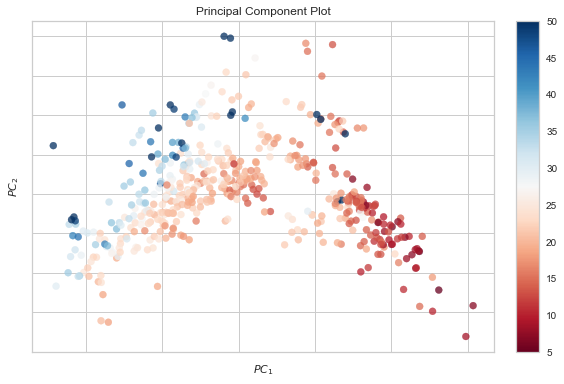

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PCA(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000010D471710C8>,
    colormap='RdBu')

In [16]:
from yellowbrick.features import pca_decomposition

pca_decomposition( X, y, scale=True )